# Exploratory Data Analysis

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

url = 'https://www.philchodrow.com/PIC16A/content/IO_and_modules/IO/palmer_penguins.csv'
penguins = pd.read_csv(url, error_bad_lines=False)
penguins = penguins[(penguins["Sex"]!= ".") & (penguins["Sex"].isna() == False)]
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,PAL0910,119,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,No,12/1/09,47.2,13.7,214.0,4925.0,FEMALE,7.99184,-26.20538,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [107]:
def table(df, group, val):
    return df.groupby(group)[val].aggregate([np.mean, np.std]).round(2)

def cleanData(df, col):
    """
    This function cleans the data by removing unnessary words within the dataset 
    """
    df[col] = df[col].str.split().str.get(0)
    return df

In [111]:
group = ["Species", "Island", "Sex"]
val = ["Flipper Length (mm)", "Culmen Depth (mm)", "Culmen Length (mm)", "Body Mass (g)", 
       "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

cleanData(penguins, "Species")
data1 = table(penguins, group, val)
data1


Flipper Length (mm)       Culmen Depth (mm)        \
                                          mean   std              mean   std   
Species   Island    Sex                                                        
Adelie    Biscoe    FEMALE              187.18  6.74             17.70  1.09   
                    MALE                190.41  6.46             19.04  0.88   
          Dream     FEMALE              187.85  5.51             17.62  0.90   
                    MALE                191.93  6.80             18.84  1.03   
          Torgersen FEMALE              188.29  4.64             17.55  0.88   
                    MALE                194.91  5.92             19.39  1.08   
Chinstrap Dream     FEMALE              191.74  5.75             17.59  0.78   
                    MALE                199.91  5.98             19.25  0.76   
Gentoo    Biscoe    FEMALE              212.71  3.90             14.24  0.54   
                    MALE                221.54  5.67             15.72  0.74   

                           Culmen Length (mm)       Body Mass (g)          \
                                         mean   std          mean     std   
Species   Island    Sex                                                     
Adelie    Biscoe    FEMALE              37.36  1.76       3369.32  343.47   
                    MALE                40.59  2.01       4050.00  355.57   
          Dream     FEMALE              36.91  2.09       3344.44  212.06   
                    MALE                40.07  1.75       4045.54  330.55   
          Torgersen FEMALE              37.55  2.21       3395.83  259.14   
                    MALE                40.59  3.03       4034.78  372.47   
Chinstrap Dream     FEMALE              46.57  3.11       3527.21  285.33   
                    MALE                51.09  1.56       3938.97  362.14   
Gentoo    Biscoe    FEMALE              45.56  2.05       4679.74  281.58   
                    MALE                49.47  2.72       5484.84  313.16   

                           Delta 15 N (o/oo)       Delta 13 C (o/oo)        
                                        mean   std              mean   std  
Species   Island    Sex                                                     
Adelie    Biscoe    FEMALE              8.77  0.40            -25.92  0.60  
                    MALE                8.87  0.37            -25.92  0.50  
          Dream     FEMALE              8.91  0.50            -25.74  0.58  
                    MALE                8.98  0.32            -25.76  0.63  
          Torgersen FEMALE              8.66  0.50            -25.74  0.67  
                    MALE                8.92  0.41            -25.84  0.56  
Chinstrap Dream     FEMALE              9.25  0.32            -24.57  0.24  
                    MALE                9.46  0.39            -24.53  0.24  
Gentoo    Biscoe    FEMALE              8.19  0.28            -26.20  0.53  
                    MALE                8.30  0.25            -26.17  0.55

From the table, we observe that on average, male penguins carry larger measurement values compared to female penguins. The differences between the same species of penguins residing on different islands is not very significant, thus we can infer that islands are not a strong predictor of penguin species. 

""


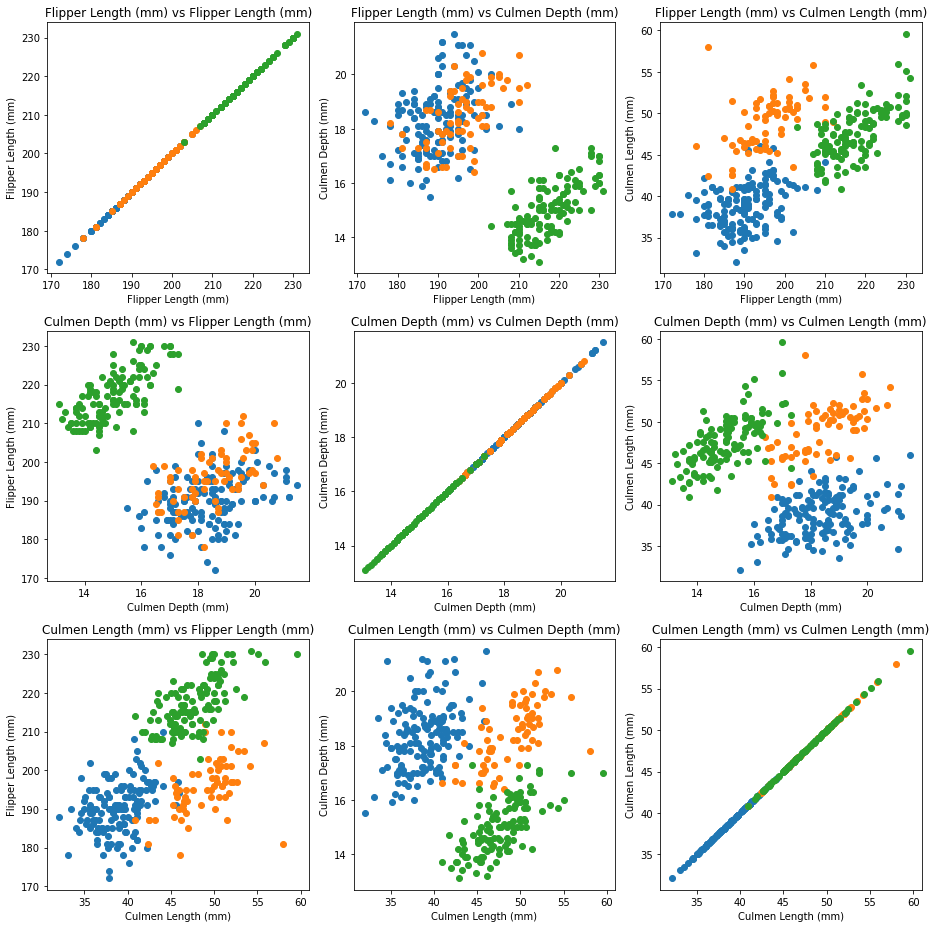

In [5]:
import seaborn as sns

val = ["Flipper Length (mm)", "Culmen Depth (mm)", "Culmen Length (mm)"]
fig1, ax = plt.subplots(3,3, figsize = (13,13))
def scatterplotMatrix(df, x,y):
    numX = len(x)
    numY = len(y)
    
    plt.tight_layout()

    for i in range(numX):
        for j in range(numY): 
                ax[i,j].scatter(df[x[i]], df[y[j]])
                ax[i,j].set(xlabel = x[i], ylabel = y[j], title = x[i] + " vs " + y[j])
    #ax.legend()            
    plt.tight_layout()
    

penguins.groupby("Species").apply(scatterplotMatrix, val, val)


(150.0, 250.0)

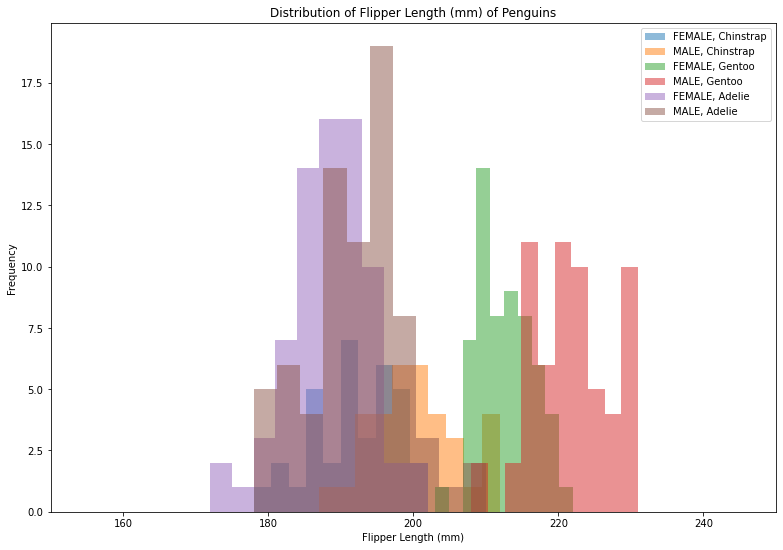

In [6]:
fig2, ax = plt.subplots(1, figsize =(13,9))

def histogram(df, cat1, cat2 = "None", cat3 = "None"):
    
    #cat1 represents categorical variables
    #cat2 represents a categorical subset of cat1
    
    if(cat2 != "None"):
        sub1 = set(df[cat2])
        if(cat3 != "None"):
            sub2 = set(df[cat3])
            for i in sub1:
                temp = df[df[cat2] ==i]
                for j in sub2:
                    temp1 = temp[temp[cat3] ==j]
                    ax.hist(temp1[cat1], alpha = 0.5, label = j + ", " + str(i))
        else:
            for i in sub1:
                temp = df[df[cat2] == i]
                ax.hist(temp[cat1], alpha = 0.5, label = str(i))
                
        ax.set(xlabel = cat1, ylabel = "Frequency", title = "Distribution of " + cat1 + " of Penguins")
        ax.legend()     
            
    else:
        ax.hist(df[cat1], alpha = 0.5)
        ax.set(xlabel = cat1, ylabel = cat1 + " of Penguins", title = "Distribution of " + cat1 + " of Penguins")
        
        
        

histogram(penguins, "Flipper Length (mm)", "Species", "Sex")
plt.xlim([150,250])

<AxesSubplot:xlabel='Species', ylabel='Culmen Length (mm)'>

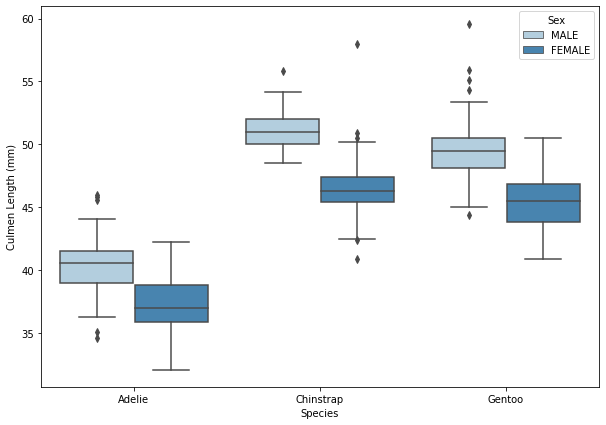

In [7]:
import seaborn as sns

fig3, ax = plt.subplots(1, figsize = (10,7))
nan = penguins[(penguins["Sex"]!= 3)]
sns.boxplot(data = nan, y = "Culmen Length (mm)",x = "Species", hue = "Sex", palette = "Blues")

# FEATURE SELECTION

**CLEAN AND PREPARE DATA**

In [3]:
from sklearn.model_selection import train_test_split
#create test and training data
np.random.seed(1234)
train, test = train_test_split(penguins, test_size = 0.2,random_state= 33)
train

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
149,PAL0910,150,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N84A2,Yes,11/17/09,37.8,18.1,193.0,3750.0,MALE,8.97533,-26.03495,NaN
62,PAL0809,63,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N28A1,Yes,11/13/08,37.6,17.0,185.0,3600.0,FEMALE,8.58063,-26.21569,NaN
118,PAL0910,119,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N64A1,Yes,11/22/09,35.7,17.0,189.0,3350.0,FEMALE,8.96436,-23.90309,NaN
210,PAL0910,59,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N95A1,Yes,11/21/09,50.2,18.8,202.0,3800.0,MALE,9.74492,-24.40400,NaN
34,PAL0708,35,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N23A1,Yes,11/16/07,36.4,17.0,195.0,3325.0,FEMALE,9.17847,-25.23061,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,PAL0910,56,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N93A2,Yes,11/27/09,52.2,18.8,197.0,3450.0,MALE,9.77528,-24.56481,NaN
152,PAL0708,1,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N61A1,No,11/19/07,46.5,17.9,192.0,3500.0,FEMALE,9.03935,-24.30229,NaN
72,PAL0809,73,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N35A1,Yes,11/11/08,39.6,17.2,196.0,3550.0,FEMALE,8.33524,-26.55351,NaN
222,PAL0708,3,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A1,Yes,11/27/07,48.7,14.1,210.0,4450.0,FEMALE,8.14705,-25.46172,NaN


In [4]:
from sklearn import preprocessing

def prepareData(df):
    le = preprocessing.LabelEncoder()
    df= df[(df["Sex"].isna() == False) & (df["Sex"]!= ".")]
    
    #encode binary data
    df["Sex"]= le.fit_transform(df["Sex"])
    df["Island"] = le.fit_transform(df["Island"])
    df["Species"] = le.fit_transform(df["Species"])
    df["Region"] = le.fit_transform(df["Region"])
    
    #remove unneccessary data 
    remove = ["studyName", "Sample Number", "Stage", "Individual ID", "Date Egg", "Comments", "Region"
             , "Clutch Completion", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]
    for i in remove:
        df = df.drop([i], axis = 1)
    
    #remove nan values
    df = df.dropna()
    
    #prepare target and predictor variables
    y = df["Species"]
    X = df.drop(["Species"], axis = 1)
    return (X,y)
prepareData(penguins)

(     Island  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
 0         2                39.1               18.7                181.0   
 1         2                39.5               17.4                186.0   
 2         2                40.3               18.0                195.0   
 4         2                36.7               19.3                193.0   
 5         2                39.3               20.6                190.0   
 ..      ...                 ...                ...                  ...   
 338       0                47.2               13.7                214.0   
 340       0                46.8               14.3                215.0   
 341       0                50.4               15.7                222.0   
 342       0                45.2               14.8                212.0   
 343       0                49.9               16.1                213.0   
 
      Body Mass (g)  Sex  
 0           3750.0    1  
 1           3800.0    0  
 2   

In [5]:
#create test and training data
test_X, test_y = prepareData(test)
train_X, train_y = prepareData(train)

**CROSS-VALIDATION FEATURE SELECTION**

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn import tree, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#this is a list of all the possible combinations of 3 features
combinations = [['Sex', 'Flipper Length (mm)', 'Body Mass (g)'],
 ['Sex','Culmen Length (mm)', 'Culmen Depth (mm)'],
 ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
 ['Island', 'Flipper Length (mm)', 'Body Mass (g)'],
 ['Island', 'Body Mass (g)','Culmen Depth (mm)'],
 ['Sex','Island','Body Mass (g)']]

def checkScore(model,col):
    '''
    Runs a k-fold cross-validation and returns the mean of scores produced
    '''
    return cross_val_score(model, train_X[col], train_y, cv = 5).mean()

In [7]:
from sklearn.linear_model import LinearRegression
MLR = LogisticRegression(multi_class = "multinomial", max_iter= 1000, C = 1.5, random_state = 33)
D = {}

for c in combinations:
    D[checkScore(MLR, c)] = c
Score, Features = max(D), D[max(D)]
print(Score, Features)
D

0.9886792452830188 ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']


{0.7593291404612159: ['Sex', 'Flipper Length (mm)', 'Body Mass (g)'],
 0.9886792452830188: ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
 0.9774283717679945: ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
 0.7593990216631725: ['Island', 'Flipper Length (mm)', 'Body Mass (g)'],
 0.7931516422082462: ['Island', 'Body Mass (g)', 'Culmen Depth (mm)'],
 0.7522012578616353: ['Sex', 'Island', 'Body Mass (g)']}

In [8]:
train_X = train_X[Features]
test_X = test_X[Features]

The highest cross validation score with the qualitative variable "Sex" and the two quantitative variables "Culmen Length (mm)" and "Culmen Depth (mm)" is 0.9886792452830188. We chose these three variables for our machine learning models because they produce the highest cross validation score. This makes sense because as we saw in our exploratory analysis, Culmen length and Culmen depth provided a good visual distinction between the three species. 

# MODELING

**FUNCTION FOR CONFUSION MATRIX AND DECISION REGIONS**

In [9]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confusionMatrix(model):
    """
    Plots Confusion Matrix
    """
    plot_confusion_matrix(model, test_X[Features], test_y,
                                                 display_labels=["Adelie","Chinstrap","Gentoo"])

def decisionRegion(c, X,y):
    """
    Plots the decision region 
    """
     # for convenience, give names to the two columns of the data
    fig, ax = plt.subplots(1,2,figsize=(10,7))
    x0 = X["Culmen Length (mm)"]
    x1 = X["Culmen Depth (mm)"]
    
    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy,zz = np.meshgrid(grid_x, grid_y,np.array([0,1])) #female corresponds with 0, male corresponds with 1

    # extract model predictions, using the np.c_ attribute to join together the two parts of the grid.
    # array.ravel() converts an multidimensional array into a 1d array, 
    #turn the resulting predictions p back into 2d
    XX = xx.ravel()
    YY = yy.ravel()
    ZZ = zz.ravel()
    XY = np.c_[XX, YY]
    XYZ = np.c_[ZZ,XX,YY]
    p = c.predict(XYZ)
    p = p.reshape(xx.shape)
    # use contour plot to visualize the predictions
    ax[0].contourf(xx[:,:,0], yy[:,:,0], p[:,:,0], cmap = "jet", alpha = 0.2)
    ax[1].contourf(xx[:,:,1], yy[:,:,1], p[:,:,1], cmap = "jet", alpha = 0.2)
    # plot the data
    
    ax[0].scatter(x0[X['Sex']==0], x1[X['Sex']==0], c = y[X['Sex']==0], cmap = "jet")
    ax[1].scatter(x0[X['Sex']==1],x1[X['Sex']==1],c=y[X['Sex']==1],cmap="jet")
    ax[0].set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)", title="Female")
    ax[1].set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)", title="Male")
    plt.tight_layout()
    
    #legend
    red_patch = mpatches.Patch(color='red', label='Gentoo')
    blue_patch = mpatches.Patch(color='blue', label='Adelie')
    green_patch = mpatches.Patch(color='green', label='Chinstrap')
    plt.legend(handles=[red_patch,blue_patch,green_patch])
    
    plt.show()
 

In [10]:
def testModel(model):
    """
    Function to test model
    """
    model.fit(train_X[Features], train_y)
    print(f"The model's score on the training data is: {model.score(train_X[Features], train_y)}")
    print(f"The model's score on the test data is: {model.score(test_X, test_y)}")

# RANDOM FOREST MODEL


### Choosing Complexity Parameter

[Text(0.5, 1.0, 'Best Depth : 4.0, Best Score= 0.9924501424501425'),
 Text(0.5, 0, 'Depth'),
 Text(0, 0.5, 'CV Score')]

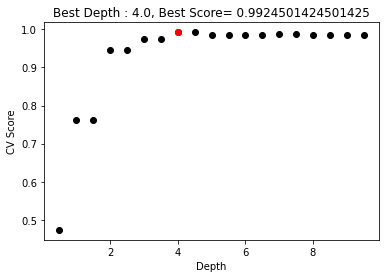

In [131]:
bestCV = 0
bestdepth = 0
fig, ax = plt.subplots(1)
for c in np.arange(0.5, 10, 0.5):
    RF = RandomForestClassifier(max_depth = c, random_state = 123)
    cv = cross_val_score(RF, train_X[Features], train_y, cv = 10).mean()
    ax.scatter(c, cv, color = "black")
    if cv > bestCV:
        bestCV = cv
        bestdepth = c
        
        
ax.scatter(bestdepth, bestCV, color = "red")
ax.set(title = "Best Depth : " + str(bestdepth)+", Best Score= "+str(bestCV), xlabel = "Depth", ylabel = "CV Score")

In [11]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(max_depth = 4, random_state = 123)

testModel(model1)

The model's score on the training data is: 0.9962406015037594
The model's score on the test data is: 0.9701492537313433


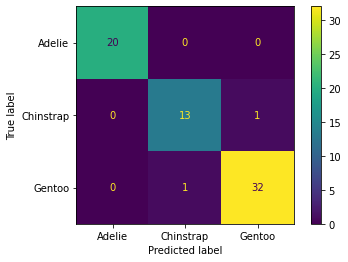

In [12]:
from sklearn.metrics import plot_confusion_matrix
confusionMatrix(model1)

The model incorrectly predicted one Gentoo penguin to be a Chinstrap. However, the rest of its predictions are fairly accurate!

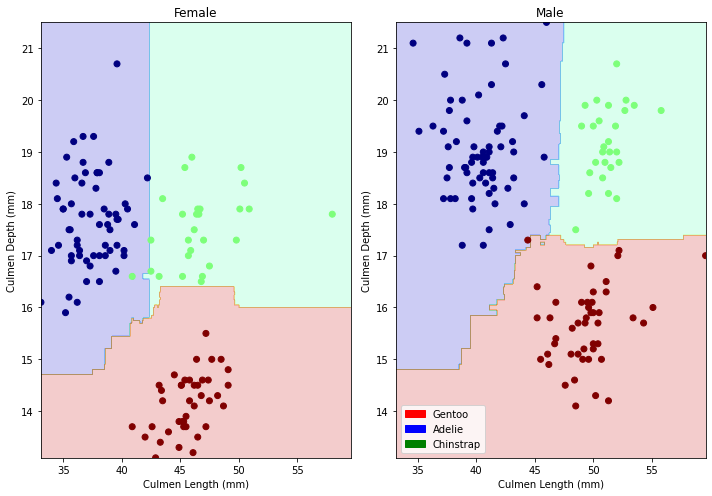

In [13]:
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import tree, preprocessing
from sklearn.ensemble import RandomForestClassifier
decisionRegion(model1,train_X,train_y)

# SVM

## Choosing Complexity Parameter

[Text(0.5, 1.0, 'Best Gamma: 1.0, Best Score= 0.9698005698005698'),
 Text(0.5, 0, 'Gamma'),
 Text(0, 0.5, 'CV Score')]

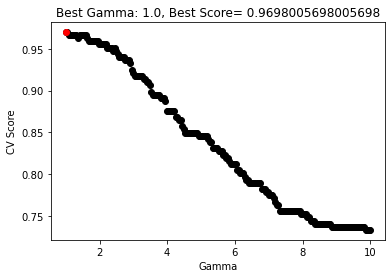

In [14]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
bestCV = 0
bestdepth = 0
fig, ax = plt.subplots(1)
for c in np.linspace(1, 10, 200):
    SVM = svm.SVC(gamma = c)
    cv = cross_val_score(SVM, train_X[Features], train_y, cv =10).mean()
    ax.scatter(c, cv, color = "black")
    if cv > bestCV:
        bestCV = cv
        bestdepth = c
        
ax.scatter(bestdepth, bestCV, color = "red")
ax.set(title = "Best Gamma: " + str(bestdepth)+", Best Score= "+str(bestCV), xlabel = "Gamma", ylabel = "CV Score")

In [15]:
model2 =  svm.SVC(gamma = 1)
#SVM.fit(train_X[Features], train_y)
testModel(model2)

The model's score on the training data is: 1.0
The model's score on the test data is: 1.0


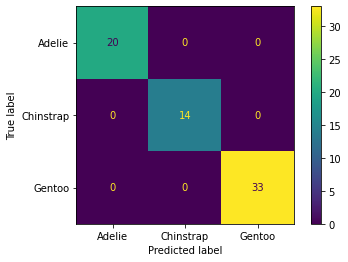

In [16]:
confusionMatrix(model2)

The model predicts the penguins correctly, but this might be due to overfitting. 

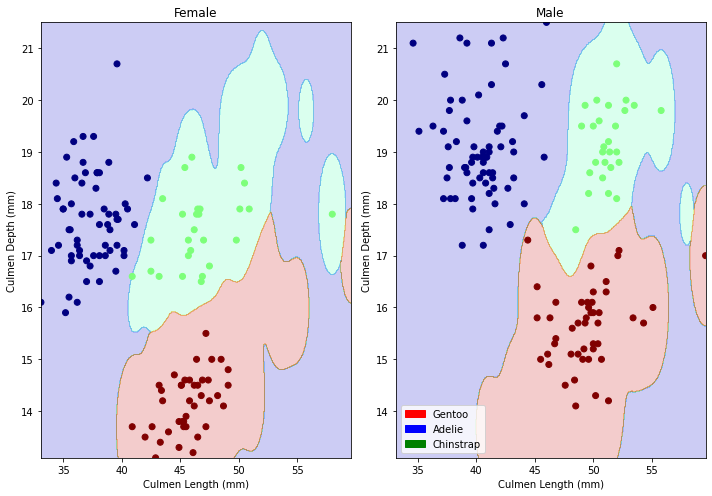

In [142]:
decisionRegion(model2,train_X,train_y)

# Logistic Regression

## Choosing Complexity Parameters

[Text(0.5, 1.0, 'Best Depth : 4.0, Best Score= 0.9887464387464387'),
 Text(0.5, 0, 'Depth'),
 Text(0, 0.5, 'CV Score')]

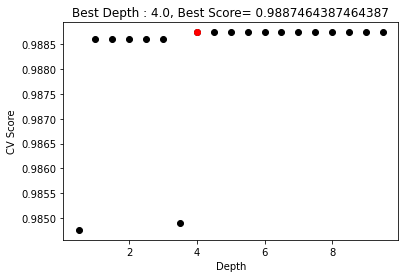

In [17]:
from sklearn.linear_model import LogisticRegression
bestCV = 0
bestdepth = 0
fig, ax = plt.subplots(1)
for c in np.arange(0.5, 10, 0.5):
    MLR = LogisticRegression(multi_class = "multinomial", max_iter= 1000, C = c, random_state = 33)
    cv = cross_val_score(MLR, train_X[Features], train_y, cv = 10).mean()
    ax.scatter(c, cv, color = "black")
    if cv > bestCV:
        bestCV = cv
        bestdepth = c
        
        
ax.scatter(bestdepth, bestCV, color = "red")
ax.set(title = "Best Depth : " + str(bestdepth)+", Best Score= "+str(bestCV), xlabel = "Depth", ylabel = "CV Score")

In [18]:
model3 = LogisticRegression(multi_class = "multinomial", max_iter= 1000, C = 4, random_state = 123)
testModel(model3)

The model's score on the training data is: 0.9962406015037594
The model's score on the test data is: 1.0


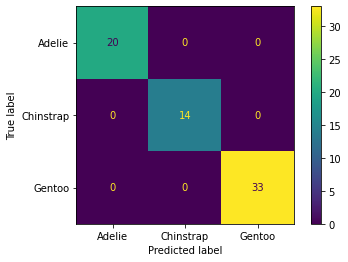

In [19]:
confusionMatrix(model3)

The model assigned all the penguin labels correctly, however, this may have a chance of overfitting.

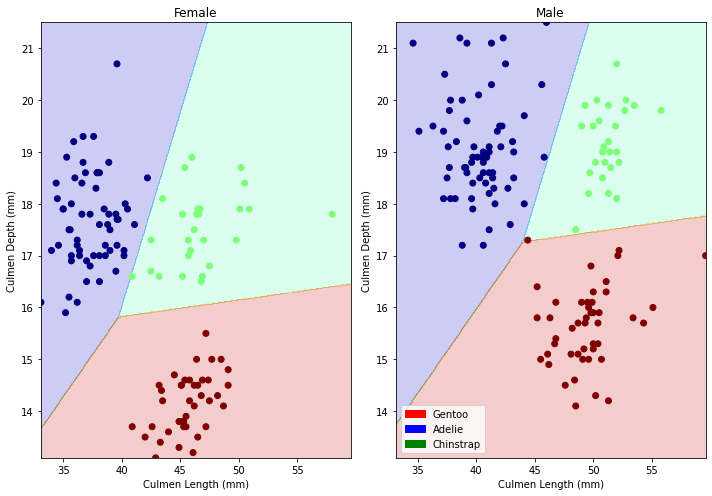

In [20]:
decisionRegion(model3,train_X,train_y)